In [9]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin

from sklearn.model_selection import BaseCrossValidator

from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.utils.validation import check_array
from sklearn.utils.multiclass import check_classification_targets
from sklearn.metrics.pairwise import pairwise_distances

In [64]:
from sklearn.datasets import make_blobs



X, y = make_blobs(n_samples=100, n_features=2, random_state=0,  )

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [66]:
X_train, y_train

(array([[-2.43972624,  4.03489855],
        [-2.67437267,  2.48006222],
        [-2.75233953,  3.76224524],
        [ 1.78726415,  1.70012006],
        [ 1.15369622,  3.90200639],
        [ 0.78478252,  1.86706037],
        [-0.27652528,  5.08127768],
        [ 1.62011397,  2.74692739],
        [ 1.74371499,  0.953829  ],
        [ 1.41942144,  1.57409695],
        [ 0.89011768,  1.79849015],
        [-1.59514562,  4.63122498],
        [ 3.23404709,  0.71773882],
        [-1.36023052,  3.5529137 ],
        [ 1.19404184,  2.80772861],
        [ 0.08080352,  4.69068983],
        [-2.81976092,  3.18493313],
        [ 2.3535057 ,  2.22404956],
        [ 2.45760916,  0.21285357],
        [-0.07228289,  2.88376939],
        [ 3.92282648,  1.80370832],
        [ 0.1631238 ,  2.57750473],
        [-0.40026809,  1.83795075],
        [ 2.41163392,  1.60423683],
        [ 0.62835793,  4.4601363 ],
        [ 2.45127423, -0.19539785],
        [ 3.93841822, -0.4500954 ],
        [ 2.63185834,  0.689

In [67]:
X_test

array([[ 1.28535145,  1.43691285],
       [ 0.94808785,  4.7321192 ],
       [ 3.00251949,  0.74265357],
       [-0.6700734 ,  2.26685667],
       [ 2.11567076,  3.06896151],
       [-2.56114686,  3.59947678],
       [-1.62535654,  2.25440397],
       [ 3.97820955,  2.37817845],
       [-2.02493646,  4.84741432],
       [-0.33887422,  3.23482487],
       [ 2.2635425 ,  1.8743027 ],
       [-0.42724442,  3.57314599],
       [-1.88089792,  1.54293097],
       [ 2.50904929,  5.7731461 ],
       [-0.57748321,  3.0054335 ],
       [ 1.12031365,  5.75806083],
       [-0.88677249,  1.30092622],
       [ 0.9845149 ,  1.95211539],
       [ 2.47034915,  4.09862906],
       [ 2.72756228,  1.3051255 ],
       [-0.73000011,  6.25456272],
       [-2.33031368,  2.22833248],
       [-0.63762777,  4.09104705],
       [ 3.2460247 ,  2.84942165],
       [ 0.4666179 ,  3.86571303]])

In [68]:
pairwise_distances(X_test, X_train)

array([[4.54155628, 4.09482303, 4.65941189, ..., 4.71253768, 0.69299217,
        3.24869549],
       [3.45881496, 4.26544029, 3.8254174 , ..., 4.19777729, 4.00539914,
        0.18987742],
       [6.3605751 , 5.93680835, 6.49894885, ..., 6.56390438, 1.64182863,
        4.36117258],
       ...,
       [1.80297297, 2.5968446 , 2.14012067, ..., 2.49105686, 3.89475049,
        1.86493424],
       [5.80802197, 5.9319079 , 6.06742288, ..., 6.28473898, 2.82317217,
        2.7983154 ],
       [2.91126433, 3.43305256, 3.2206199 , ..., 3.52167552, 3.24335245,
        1.052585  ]])

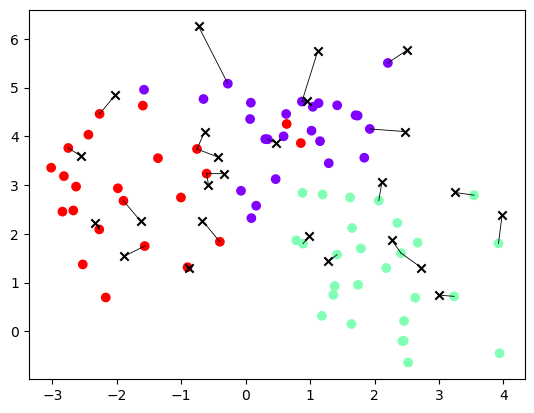

In [69]:
## plot the training set
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
# croix noir pour les points de test

plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker='x')

#draw distance to nearest neighbor for each point in test set
for x in X_test:
    # find nearest neighbor in training set
    nn = pairwise_distances(x.reshape(1, -1), X_train).argmin()
    plt.plot([x[0], X_train[nn, 0]], [x[1], X_train[nn, 1]], c='k', linewidth=0.6)


In [76]:

distances = pairwise_distances(X_test, X_train )

k_nearest_neighbors_idx = np.argsort(distances, axis=1)[:, :7]
k_nearest_labels = y_train[k_nearest_neighbors_idx]

# Find the most common label among the k nearest neighbors
y_pred = np.array([np.bincount(labels, minlength=y_train.max()+1).argmax() for labels in k_nearest_labels])


# 
y_pred.dtype

dtype('int64')

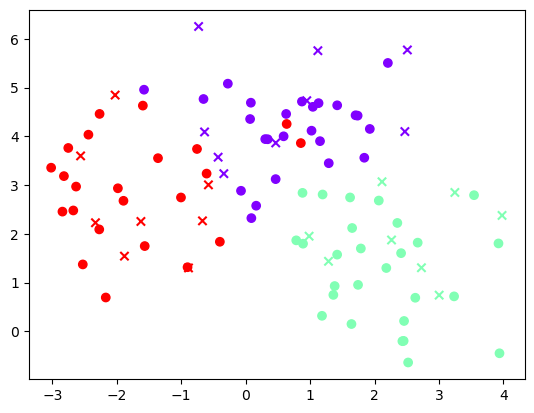

In [73]:
# plot the predictions
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='rainbow', marker='x')


---
---
---


In [78]:
from sklearn.utils import shuffle

In [90]:
shuffle_data = True
date = pd.date_range(start='2020-01-01', end='2021-01-31', freq='D')

n_samples = len(date)
X = pd.DataFrame(range(n_samples), index=date, columns=['val'])
y = pd.DataFrame(
    np.array([i % 2 for i in range(n_samples)]),
    index=date
)

if shuffle_data:
    X, y = shuffle(X, y, random_state=0)

X_1d = X['val']
X.index.unique()

DatetimeIndex(['2020-03-06', '2020-05-12', '2020-03-15', '2020-03-19',
               '2020-02-07', '2020-02-24', '2020-10-20', '2020-03-01',
               '2020-01-13', '2020-12-27',
               ...
               '2020-07-30', '2020-01-10', '2020-12-25', '2020-07-14',
               '2020-09-08', '2020-11-19', '2020-07-11', '2020-04-27',
               '2020-02-17', '2020-06-21'],
              dtype='datetime64[ns]', length=397, freq=None)